In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm, linregress

import os
import time
import itertools

from glove_VI.glv import *

from sklearn.model_selection import KFold

/home/jcthompson5@ad.wisc.edu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# number of folds
n_splits = 20

# import file names
files = os.listdir("data/SET3_Thirdtrial/")

# fit gLV models

In [3]:
def predict_df(df, species):
    
    # save measured and predicted values
    exp_names = []
    pred_species = []
    pred = []
    stdv = []
    true = []

    # pull just the community data
    test_data = process_df_glove(df, species) 

    # plot the results
    for exp, t_span, Y_m in test_data:

        # predict 
        Y_p, Y_std, _, _ = model.predict(Y_m, t_span)
        
        # set NaN to zero
        Y_p = np.nan_to_num(Y_p)
        Y_std = np.nan_to_num(Y_std)
        
        ### prediction results for species that were present ###
        inds_present = Y_m[0] > 0 
        exp_names.append([exp]*sum(inds_present)*(Y_m.shape[0]-1))
        pred_species.append(np.tile(np.vstack(species)[inds_present], Y_m.shape[0]-1).T.ravel())
        true.append(Y_m[1:,inds_present].ravel())
        pred.append(Y_p[1:,inds_present].ravel())
        stdv.append(Y_std[1:,inds_present].ravel())
                
    # concatenate list
    exp_names = np.concatenate(exp_names)
    pred_species = np.concatenate(pred_species)
    true = np.concatenate(true)
    pred = np.concatenate(pred)
    stdv = np.concatenate(stdv)
        
    return exp_names, pred_species, true, pred, stdv

Number of parameters: 72
Updating posterior...
Epoch 0, ELBO: -72008.352, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: -26496.730, Slope: 1.000
encountered 21 nans
Epoch 20, ELBO: -9300.337, Slope: 0.435
encountered 5 nans
Epoch 30, ELBO: -4497.604, Slope: 0.305
encountered 0 nans
Epoch 40, ELBO: 1480.359, Slope: 0.235
encountered 1 nans
Epoch 50, ELBO: 6294.330, Slope: 0.191
encountered 0 nans
Epoch 60, ELBO: 8281.899, Slope: 0.157
encountered 1 nans
Epoch 70, ELBO: 11610.503, Slope: 0.134
encountered 0 nans
Epoch 80, ELBO: 12717.954, Slope: 0.116
encountered 1 nans
Epoch 90, ELBO: 12960.115, Slope: 0.100
encountered 0 nans
Epoch 100, ELBO: 13155.193, Slope: 0.144
encountered 0 nans
Epoch 110, ELBO: 13278.422, Slope: 0.186
encountered 0 nans
Epoch 120, ELBO: 13473.535, Slope: 0.132
encountered 0 nans
Epoch 130, ELBO: 13525.232, Slope: 0.084
encountered 1 nans
Epoch 140, ELBO: 13588.013, Slope: 0.051
encountered 0 nans
Epoch 150, ELBO: 13572.293, Slope: 0.030
encountered 0 nans
Epoc

Epoch 10, ELBO: 13662.158, Slope: 1.000
encountered 7 nans
pass 1
Epoch 20, ELBO: 13654.599, Slope: -0.000
encountered 9 nans
pass 2
Epoch 30, ELBO: 13649.933, Slope: -0.000
encountered 11 nans
pass 3
Epoch 40, ELBO: 13644.225, Slope: -0.000
encountered 11 nans
pass 4
Epoch 50, ELBO: 13655.824, Slope: -0.000
encountered 15 nans
pass 5
Epoch 60, ELBO: 13634.894, Slope: -0.000
encountered 14 nans
Computing model evidence...

log evidence: 13665.862

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 13590.617, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 13594.811, Slope: 1.000
encountered 15 nans
pass 1
Epoch 20, ELBO: 13583.077, Slope: -0.000
encountered 15 nans
pass 2
Epoch 30, ELBO: 13588.443, Slope: -0.000
encountered 15 nans
pass 3
Epoch 40, ELBO: 13571.641, Slope: -0.000
encountered 17 nans
pass 4
Epoch 50, ELBO: 13589.261, Slope: -0.000
encountered 16 nans
pass 5
Epoch 60, ELBO: 13591.217, Slope: -0.000
encountered 16 nans
Computing model evidence...

log evidenc

Updating posterior...
Epoch 0, ELBO: 13816.413, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 13819.630, Slope: 1.000
encountered 1 nans
pass 1
Epoch 20, ELBO: 13811.459, Slope: -0.000
encountered 1 nans
pass 2
Epoch 30, ELBO: 13818.961, Slope: -0.000
encountered 3 nans
pass 3
Epoch 40, ELBO: 13816.502, Slope: -0.000
encountered 4 nans
pass 4
Epoch 50, ELBO: 13807.089, Slope: -0.000
encountered 4 nans
pass 5
Epoch 60, ELBO: 13810.609, Slope: -0.000
encountered 4 nans
Computing model evidence...

log evidence: 13820.704

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 13935.287, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 13940.108, Slope: 1.000
encountered 5 nans
pass 1
Epoch 20, ELBO: 13937.585, Slope: 0.000
encountered 4 nans
pass 2
Epoch 30, ELBO: 13924.570, Slope: -0.000
encountered 7 nans
pass 3
Epoch 40, ELBO: 13933.839, Slope: -0.000
encountered 4 nans
pass 4
Epoch 50, ELBO: 13938.370, Slope: -0.000
encountered 5 nans
pass 5
Epoch 60, ELBO: 13933.393, Slop

Updating posterior...
Epoch 0, ELBO: 13861.940, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 13855.753, Slope: 1.000
encountered 1 nans
pass 1
Epoch 20, ELBO: 13860.378, Slope: -0.000
encountered 7 nans
pass 2
Epoch 30, ELBO: 13856.211, Slope: -0.000
encountered 4 nans
pass 3
Epoch 40, ELBO: 13836.729, Slope: -0.000
encountered 3 nans
pass 4
Epoch 50, ELBO: 13830.229, Slope: -0.000
encountered 2 nans
pass 5
Epoch 60, ELBO: 13856.094, Slope: -0.000
encountered 2 nans
Computing model evidence...

log evidence: 13853.088

Number of parameters: 72
Updating posterior...
Epoch 0, ELBO: -71827.375, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: -32340.217, Slope: 1.000
encountered 14 nans
Epoch 20, ELBO: -6816.164, Slope: 0.453
encountered 0 nans
Epoch 30, ELBO: 949.808, Slope: 0.340
encountered 0 nans
Epoch 40, ELBO: 1650.259, Slope: 0.251
encountered 0 nans
Epoch 50, ELBO: 3129.398, Slope: 0.193
encountered 0 nans
Epoch 60, ELBO: 8309.608, Slope: 0.159
encountered 0 nans
Epoch 70, ELBO:

pass 3
Epoch 70, ELBO: 13197.022, Slope: 0.001
encountered 0 nans
pass 4
Epoch 80, ELBO: 13186.729, Slope: 0.001
encountered 1 nans
pass 5
Epoch 90, ELBO: 13196.950, Slope: 0.001
encountered 1 nans
Computing model evidence...

log evidence: 13207.779

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 14020.829, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 14026.351, Slope: 1.000
encountered 2 nans
pass 1
Epoch 20, ELBO: 14020.918, Slope: 0.000
encountered 5 nans
pass 2
Epoch 30, ELBO: 14018.328, Slope: -0.000
encountered 5 nans
pass 3
Epoch 40, ELBO: 14032.548, Slope: 0.000
encountered 5 nans
pass 4
Epoch 50, ELBO: 14026.474, Slope: 0.000
encountered 7 nans
pass 5
Epoch 60, ELBO: 14033.931, Slope: 0.000
encountered 8 nans
Computing model evidence...

log evidence: 14012.909

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 14171.342, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 14202.481, Slope: 1.000
encountered 7 nans
pass 1
Epoch 20, ELBO: 14172.

pass 5
Epoch 60, ELBO: 14027.914, Slope: 0.000
encountered 11 nans
Computing model evidence...

log evidence: 14008.108

Number of parameters: 72
Updating posterior...
Epoch 0, ELBO: -70750.375, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: -26631.543, Slope: 1.000
encountered 13 nans
Epoch 20, ELBO: -8081.543, Slope: 0.443
encountered 2 nans
Epoch 30, ELBO: 621.062, Slope: 0.329
encountered 0 nans
Epoch 40, ELBO: 4877.515, Slope: 0.252
encountered 0 nans
Epoch 50, ELBO: 8711.174, Slope: 0.202
encountered 0 nans
Epoch 60, ELBO: 9166.579, Slope: 0.163
encountered 0 nans
Epoch 70, ELBO: 11677.469, Slope: 0.136
encountered 1 nans
Epoch 80, ELBO: 13425.647, Slope: 0.116
encountered 2 nans
Epoch 90, ELBO: 13526.415, Slope: 0.100
encountered 1 nans
Epoch 100, ELBO: 13666.534, Slope: 0.136
encountered 0 nans
Epoch 110, ELBO: 13771.958, Slope: 0.153
encountered 0 nans
Epoch 120, ELBO: 13823.155, Slope: 0.097
encountered 0 nans
Epoch 130, ELBO: 13868.956, Slope: 0.064
encountered 0 nans
Epoch

Computing model evidence...

log evidence: 13510.218

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 13398.848, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 13389.608, Slope: 1.000
encountered 0 nans
pass 1
Epoch 20, ELBO: 13399.397, Slope: 0.000
encountered 2 nans
pass 2
Epoch 30, ELBO: 13407.241, Slope: 0.000
encountered 3 nans
pass 3
Epoch 40, ELBO: 13381.686, Slope: -0.000
encountered 1 nans
pass 4
Epoch 50, ELBO: 13386.412, Slope: -0.000
encountered 3 nans
pass 5
Epoch 60, ELBO: 13395.653, Slope: -0.000
encountered 4 nans
Computing model evidence...

log evidence: 13403.112

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 13289.798, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 13292.492, Slope: 1.000
encountered 4 nans
pass 1
Epoch 20, ELBO: 13283.632, Slope: -0.000
encountered 1 nans
pass 2
Epoch 30, ELBO: 13286.717, Slope: -0.000
encountered 7 nans
pass 3
Epoch 40, ELBO: 13293.548, Slope: 0.000
encountered 5 nans
pass 4
Epoch 50, ELBO: 13

Epoch 50, ELBO: 13823.171, Slope: 0.001
encountered 0 nans
pass 1
Epoch 60, ELBO: 13818.907, Slope: 0.001
encountered 1 nans
pass 2
Epoch 70, ELBO: 13803.795, Slope: 0.001
encountered 2 nans
pass 3
Epoch 80, ELBO: 13814.568, Slope: 0.001
encountered 3 nans
pass 4
Epoch 90, ELBO: 13810.316, Slope: 0.001
encountered 0 nans
pass 5
Epoch 100, ELBO: 13810.903, Slope: 0.000
encountered 1 nans
Computing model evidence...

log evidence: 13826.298

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 14355.504, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 14361.190, Slope: 1.000
encountered 1 nans
pass 1
Epoch 20, ELBO: 14354.037, Slope: -0.000
encountered 6 nans
pass 2
Epoch 30, ELBO: 14365.405, Slope: 0.000
encountered 5 nans
pass 3
Epoch 40, ELBO: 14345.893, Slope: -0.000
encountered 8 nans
pass 4
Epoch 50, ELBO: 14360.790, Slope: -0.000
encountered 3 nans
pass 5
Epoch 60, ELBO: 14370.660, Slope: 0.000
encountered 4 nans
Computing model evidence...

log evidence: 14366.652

Up

Epoch 60, ELBO: 13348.113, Slope: 0.001
encountered 0 nans
Epoch 70, ELBO: 13336.352, Slope: 0.001
encountered 1 nans
pass 1
Epoch 80, ELBO: 13331.218, Slope: 0.001
encountered 0 nans
pass 2
Epoch 90, ELBO: 13347.878, Slope: 0.001
encountered 0 nans
pass 3
Epoch 100, ELBO: 13345.070, Slope: 0.000
encountered 0 nans
pass 4
Epoch 110, ELBO: 13341.547, Slope: 0.000
encountered 0 nans
pass 5
Epoch 120, ELBO: 13346.909, Slope: 0.000
encountered 0 nans
Computing model evidence...

log evidence: 13351.352

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 14274.148, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 14296.673, Slope: 1.000
encountered 0 nans
pass 1
Epoch 20, ELBO: 14295.754, Slope: 0.001
encountered 0 nans
pass 2
Epoch 30, ELBO: 14288.186, Slope: 0.000
encountered 1 nans
pass 3
Epoch 40, ELBO: 14299.666, Slope: 0.000
encountered 1 nans
pass 4
Epoch 50, ELBO: 14277.596, Slope: 0.000
encountered 1 nans
pass 5
Epoch 60, ELBO: 14304.750, Slope: 0.000
encountered 0 nan

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 13788.687, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 13861.257, Slope: 1.000
encountered 0 nans
Epoch 20, ELBO: 13852.804, Slope: 0.002
encountered 0 nans
Epoch 30, ELBO: 13878.893, Slope: 0.002
encountered 0 nans
Epoch 40, ELBO: 13892.481, Slope: 0.002
encountered 1 nans
Epoch 50, ELBO: 13896.297, Slope: 0.001
encountered 0 nans
Epoch 60, ELBO: 13889.426, Slope: 0.001
encountered 4 nans
pass 1
Epoch 70, ELBO: 13901.532, Slope: 0.001
encountered 2 nans
pass 2
Epoch 80, ELBO: 13900.083, Slope: 0.001
encountered 4 nans
pass 3
Epoch 90, ELBO: 13908.688, Slope: 0.001
encountered 2 nans
pass 4
Epoch 100, ELBO: 13926.250, Slope: 0.000
encountered 0 nans
pass 5
Epoch 110, ELBO: 13932.017, Slope: 0.000
encountered 0 nans
Computing model evidence...

log evidence: 13919.262

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 14188.805, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 14188.601, Slope: 1.000
enco

pass 3
Epoch 40, ELBO: 13789.178, Slope: -0.000
encountered 48 nans
pass 4
Epoch 50, ELBO: 13782.138, Slope: -0.000
encountered 52 nans
pass 5
Epoch 60, ELBO: 13814.251, Slope: -0.000
encountered 47 nans
Computing model evidence...

log evidence: 13810.077

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 14085.891, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 14040.618, Slope: 1.000
encountered 61 nans
Epoch 20, ELBO: 14042.093, Slope: -0.002
encountered 55 nans
pass 1
Epoch 30, ELBO: 14073.499, Slope: -0.000
encountered 50 nans
pass 2
Epoch 40, ELBO: 14094.083, Slope: 0.000
encountered 58 nans
pass 3
Epoch 50, ELBO: 14102.008, Slope: 0.001
encountered 62 nans
pass 4
Epoch 60, ELBO: 14080.422, Slope: 0.000
encountered 57 nans
pass 5
Epoch 70, ELBO: 14075.583, Slope: 0.000
encountered 59 nans
Computing model evidence...

log evidence: 14082.535

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 14004.160, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO:

pass 4
Epoch 90, ELBO: 12993.019, Slope: 0.001
encountered 2 nans
pass 5
Epoch 100, ELBO: 13006.612, Slope: 0.000
encountered 1 nans
Computing model evidence...

log evidence: 12997.358

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 13986.007, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 14014.626, Slope: 1.000
encountered 2 nans
pass 1
Epoch 20, ELBO: 14003.817, Slope: 0.001
encountered 3 nans
pass 2
Epoch 30, ELBO: 14006.706, Slope: 0.000
encountered 5 nans
pass 3
Epoch 40, ELBO: 14003.861, Slope: 0.000
encountered 8 nans
pass 4
Epoch 50, ELBO: 14006.420, Slope: 0.000
encountered 9 nans
pass 5
Epoch 60, ELBO: 14014.080, Slope: 0.000
encountered 9 nans
Computing model evidence...

log evidence: 14010.228

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 13999.805, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 14002.501, Slope: 1.000
encountered 9 nans
pass 1
Epoch 20, ELBO: 13989.050, Slope: -0.000
encountered 8 nans
pass 2
Epoch 30, ELBO: 13975

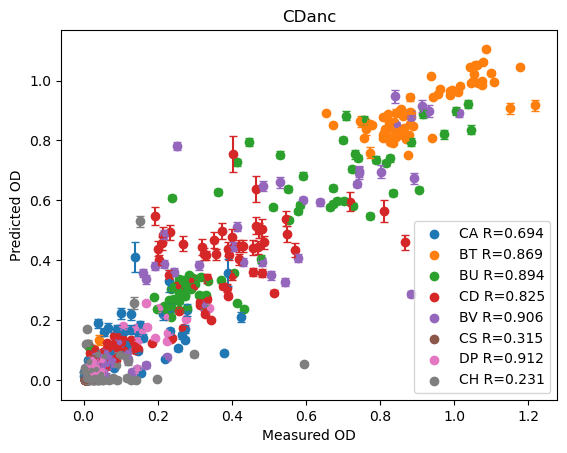

Number of parameters: 72
Updating posterior...
Epoch 0, ELBO: -67854.406, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: -34007.145, Slope: 1.000
encountered 20 nans
Epoch 20, ELBO: -13890.875, Slope: 0.398
encountered 9 nans
Epoch 30, ELBO: -3213.203, Slope: 0.315
encountered 0 nans
Epoch 40, ELBO: -349.524, Slope: 0.244
encountered 0 nans
Epoch 50, ELBO: 1563.339, Slope: 0.193
encountered 0 nans
Epoch 60, ELBO: 6366.428, Slope: 0.162
encountered 0 nans
Epoch 70, ELBO: 10203.973, Slope: 0.140
encountered 1 nans
Epoch 80, ELBO: 10458.715, Slope: 0.121
encountered 1 nans
Epoch 90, ELBO: 10714.362, Slope: 0.104
encountered 1 nans
Epoch 100, ELBO: 10922.513, Slope: 0.121
encountered 0 nans
Epoch 110, ELBO: 11080.744, Slope: 0.179
encountered 0 nans
Epoch 120, ELBO: 11252.361, Slope: 0.146
encountered 0 nans
Epoch 130, ELBO: 11358.793, Slope: 0.106
encountered 0 nans
Epoch 140, ELBO: 11448.455, Slope: 0.069
encountered 0 nans
Epoch 150, ELBO: 11504.644, Slope: 0.032
encountered 0 nans
Epo

Computing model evidence...

log evidence: 11596.479

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 8915.426, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 9180.235, Slope: 1.000
encountered 0 nans
Epoch 20, ELBO: 9203.553, Slope: 0.016
encountered 0 nans
Epoch 30, ELBO: 9178.131, Slope: 0.009
encountered 0 nans
Epoch 40, ELBO: 9166.309, Slope: 0.005
encountered 0 nans
Epoch 50, ELBO: 9183.438, Slope: 0.004
encountered 0 nans
Epoch 60, ELBO: 9146.390, Slope: 0.003
encountered 0 nans
Epoch 70, ELBO: 9183.246, Slope: 0.002
encountered 0 nans
Epoch 80, ELBO: 9202.057, Slope: 0.002
encountered 0 nans
Epoch 90, ELBO: 9128.374, Slope: 0.001
encountered 0 nans
pass 1
Epoch 100, ELBO: 9177.194, Slope: -0.000
encountered 0 nans
pass 2
fail 1
Epoch 110, ELBO: 9167.980, Slope: -0.000
encountered 0 nans
pass 3
Epoch 120, ELBO: 9197.176, Slope: 0.000
encountered 0 nans
pass 4
fail 1
Epoch 130, ELBO: 9129.038, Slope: -0.000
encountered 0 nans
pass 5
Epoch 140, ELBO: 9198.631, Sl

Epoch 170, ELBO: 11508.024, Slope: 0.008
encountered 0 nans
Epoch 180, ELBO: 11556.681, Slope: 0.007
encountered 0 nans
Epoch 190, ELBO: 11549.101, Slope: 0.006
encountered 0 nans
Epoch 200, ELBO: 11628.438, Slope: 0.006
encountered 0 nans
Epoch 210, ELBO: 11624.966, Slope: 0.005
encountered 0 nans
Epoch 220, ELBO: 11661.490, Slope: 0.005
encountered 0 nans
Epoch 230, ELBO: 11671.844, Slope: 0.004
encountered 0 nans
Epoch 240, ELBO: 11699.099, Slope: 0.003
encountered 0 nans
Epoch 250, ELBO: 11640.475, Slope: 0.002
encountered 0 nans
Epoch 260, ELBO: 11666.242, Slope: 0.002
encountered 0 nans
Epoch 270, ELBO: 11682.837, Slope: 0.001
encountered 0 nans
pass 1
Epoch 280, ELBO: 11684.180, Slope: 0.001
encountered 0 nans
pass 2
Epoch 290, ELBO: 11716.942, Slope: 0.001
encountered 0 nans
pass 3
Epoch 300, ELBO: 11702.996, Slope: 0.001
encountered 0 nans
pass 4
Epoch 310, ELBO: 11723.180, Slope: 0.001
encountered 0 nans
pass 5
Epoch 320, ELBO: 11675.272, Slope: 0.000
encountered 0 nans
Updat

Epoch 160, ELBO: 11753.894, Slope: 0.013
encountered 0 nans
Epoch 170, ELBO: 11727.865, Slope: 0.010
encountered 0 nans
Epoch 180, ELBO: 11803.565, Slope: 0.008
encountered 0 nans
Epoch 190, ELBO: 11804.778, Slope: 0.006
encountered 0 nans
Epoch 200, ELBO: 11814.293, Slope: 0.004
encountered 0 nans
Epoch 210, ELBO: 11830.900, Slope: 0.003
encountered 0 nans
Epoch 220, ELBO: 11821.931, Slope: 0.002
encountered 0 nans
Epoch 230, ELBO: 11839.155, Slope: 0.002
encountered 0 nans
Epoch 240, ELBO: 11841.394, Slope: 0.001
encountered 0 nans
pass 1
Epoch 250, ELBO: 11844.901, Slope: 0.001
encountered 0 nans
pass 2
Epoch 260, ELBO: 11842.238, Slope: 0.001
encountered 0 nans
pass 3
Epoch 270, ELBO: 11834.641, Slope: 0.000
encountered 0 nans
pass 4
Epoch 280, ELBO: 11867.252, Slope: 0.000
encountered 0 nans
pass 5
Epoch 290, ELBO: 11867.981, Slope: 0.000
encountered 0 nans
Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 11530.105, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 1

Epoch 30, ELBO: 11532.635, Slope: -0.002
encountered 0 nans
pass 1
Epoch 40, ELBO: 11636.740, Slope: -0.001
encountered 0 nans
pass 2
Epoch 50, ELBO: 11627.756, Slope: -0.000
encountered 0 nans
pass 3
Epoch 60, ELBO: 11634.259, Slope: 0.000
encountered 0 nans
pass 4
Epoch 70, ELBO: 11626.190, Slope: 0.000
encountered 1 nans
pass 5
Epoch 80, ELBO: 11624.873, Slope: 0.000
encountered 0 nans
Computing model evidence...

log evidence: 11555.190

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 8827.567, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 8891.764, Slope: 1.000
encountered 1 nans
Epoch 20, ELBO: 8873.593, Slope: 0.003
encountered 2 nans
Epoch 30, ELBO: 8877.878, Slope: 0.001
encountered 1 nans
Epoch 40, ELBO: 8879.022, Slope: 0.001
encountered 2 nans
Epoch 50, ELBO: 8903.760, Slope: 0.001
encountered 4 nans
pass 1
Epoch 60, ELBO: 8898.155, Slope: 0.001
encountered 3 nans
pass 2
Epoch 70, ELBO: 8883.329, Slope: 0.001
encountered 3 nans
pass 3
Epoch 80, ELBO: 8909

Epoch 200, ELBO: 11656.223, Slope: 0.005
encountered 0 nans
Epoch 210, ELBO: 11707.961, Slope: 0.004
encountered 1 nans
Epoch 220, ELBO: 11644.832, Slope: 0.002
encountered 0 nans
Epoch 230, ELBO: 11712.817, Slope: 0.002
encountered 0 nans
Epoch 240, ELBO: 11673.550, Slope: 0.001
encountered 0 nans
Epoch 250, ELBO: 11719.069, Slope: 0.001
encountered 0 nans
pass 1
Epoch 260, ELBO: 11693.389, Slope: 0.001
encountered 0 nans
pass 2
Epoch 270, ELBO: 11673.655, Slope: 0.000
encountered 0 nans
pass 3
Epoch 280, ELBO: 11727.104, Slope: 0.000
encountered 0 nans
pass 4
Epoch 290, ELBO: 11735.345, Slope: 0.001
encountered 0 nans
pass 5
Epoch 300, ELBO: 11772.204, Slope: 0.001
encountered 0 nans
Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 11422.783, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 11507.165, Slope: 1.000
encountered 0 nans
Epoch 20, ELBO: 11538.142, Slope: 0.005
encountered 0 nans
Epoch 30, ELBO: 11554.119, Slope: 0.004
encountered 0 nans
Epoch 40, ELBO: 1157

pass 5
Epoch 60, ELBO: 11670.843, Slope: -0.000
encountered 0 nans
Computing model evidence...

log evidence: 11674.449

Number of parameters: 72
Updating posterior...
Epoch 0, ELBO: -69875.039, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: -41629.039, Slope: 1.000
encountered 8 nans
Epoch 20, ELBO: -21545.742, Slope: 0.346
encountered 5 nans
Epoch 30, ELBO: -3957.985, Slope: 0.312
encountered 1 nans
Epoch 40, ELBO: -90.276, Slope: 0.254
encountered 1 nans
Epoch 50, ELBO: 5208.177, Slope: 0.212
encountered 0 nans
Epoch 60, ELBO: 6300.942, Slope: 0.176
encountered 0 nans
Epoch 70, ELBO: 7171.628, Slope: 0.147
encountered 0 nans
Epoch 80, ELBO: 10766.587, Slope: 0.127
encountered 1 nans
Epoch 90, ELBO: 10864.828, Slope: 0.110
encountered 0 nans
Epoch 100, ELBO: 10977.429, Slope: 0.116
encountered 0 nans
Epoch 110, ELBO: 11123.669, Slope: 0.132
encountered 0 nans
Epoch 120, ELBO: 11221.669, Slope: 0.141
encountered 0 nans
Epoch 130, ELBO: 11339.661, Slope: 0.097
encountered 0 nans
Epoch

pass 5
Epoch 140, ELBO: 11597.511, Slope: 0.000
encountered 0 nans
Computing model evidence...

log evidence: 11584.251

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 9116.174, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 9236.128, Slope: 1.000
encountered 0 nans
Epoch 20, ELBO: 9213.290, Slope: 0.005
encountered 0 nans
Epoch 30, ELBO: 9225.973, Slope: 0.003
encountered 0 nans
pass 1
Epoch 40, ELBO: 9150.276, Slope: 0.001
encountered 0 nans
pass 2
Epoch 50, ELBO: 9220.709, Slope: 0.001
encountered 1 nans
Epoch 60, ELBO: 9244.150, Slope: 0.001
encountered 0 nans
pass 1
Epoch 70, ELBO: 9214.267, Slope: 0.001
encountered 0 nans
pass 2
Epoch 80, ELBO: 9227.117, Slope: 0.001
encountered 0 nans
pass 3
Epoch 90, ELBO: 9240.737, Slope: 0.001
encountered 0 nans
pass 4
Epoch 100, ELBO: 9226.663, Slope: 0.000
encountered 0 nans
pass 5
Epoch 110, ELBO: 9235.160, Slope: 0.000
encountered 2 nans
Computing model evidence...

log evidence: 9226.129

Updating hyperparameters...
Up

pass 3
Epoch 260, ELBO: 11718.837, Slope: 0.001
encountered 0 nans
pass 4
Epoch 270, ELBO: 11760.850, Slope: 0.000
encountered 0 nans
pass 5
Epoch 280, ELBO: 11752.522, Slope: 0.000
encountered 0 nans
Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 11343.719, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 11390.051, Slope: 1.000
encountered 0 nans
Epoch 20, ELBO: 11398.372, Slope: 0.002
encountered 0 nans
Epoch 30, ELBO: 11394.919, Slope: 0.001
encountered 0 nans
pass 1
Epoch 40, ELBO: 11397.313, Slope: 0.001
encountered 0 nans
pass 2
Epoch 50, ELBO: 11353.511, Slope: 0.000
encountered 0 nans
pass 3
Epoch 60, ELBO: 11372.148, Slope: 0.000
encountered 0 nans
pass 4
Epoch 70, ELBO: 11423.429, Slope: 0.000
encountered 0 nans
pass 5
Epoch 80, ELBO: 11405.075, Slope: 0.000
encountered 0 nans
Computing model evidence...

log evidence: 11404.438

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 8975.094, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 9126.29

Epoch 30, ELBO: -3051.671, Slope: 0.305
encountered 2 nans
Epoch 40, ELBO: 3290.746, Slope: 0.243
encountered 0 nans
Epoch 50, ELBO: 10130.599, Slope: 0.204
encountered 0 nans
Epoch 60, ELBO: 10359.585, Slope: 0.169
encountered 0 nans
Epoch 70, ELBO: 10680.298, Slope: 0.141
encountered 0 nans
Epoch 80, ELBO: 10859.292, Slope: 0.118
encountered 0 nans
Epoch 90, ELBO: 11050.120, Slope: 0.101
encountered 0 nans
Epoch 100, ELBO: 11206.017, Slope: 0.140
encountered 0 nans
Epoch 110, ELBO: 11343.729, Slope: 0.162
encountered 0 nans
Epoch 120, ELBO: 11454.069, Slope: 0.103
encountered 0 nans
Epoch 130, ELBO: 11525.927, Slope: 0.047
encountered 0 nans
Epoch 140, ELBO: 11539.168, Slope: 0.014
encountered 0 nans
Epoch 150, ELBO: 11586.062, Slope: 0.011
encountered 0 nans
Epoch 160, ELBO: 11665.359, Slope: 0.009
encountered 0 nans
Epoch 170, ELBO: 11671.252, Slope: 0.007
encountered 0 nans
Epoch 180, ELBO: 11707.714, Slope: 0.006
encountered 0 nans
Epoch 190, ELBO: 11714.896, Slope: 0.004
encount

pass 3
Epoch 60, ELBO: 9169.484, Slope: 0.000
encountered 3 nans
pass 4
Epoch 70, ELBO: 9158.053, Slope: 0.000
encountered 4 nans
pass 5
Epoch 80, ELBO: 9173.926, Slope: 0.000
encountered 2 nans
Computing model evidence...

log evidence: 9165.671

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 11744.024, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 11727.005, Slope: 1.000
encountered 4 nans
pass 1
Epoch 20, ELBO: 11747.197, Slope: 0.000
encountered 4 nans
pass 2
Epoch 30, ELBO: 11706.668, Slope: -0.001
encountered 5 nans
pass 3
Epoch 40, ELBO: 11707.727, Slope: -0.001
encountered 4 nans
pass 4
Epoch 50, ELBO: 11756.478, Slope: -0.000
encountered 6 nans
pass 5
Epoch 60, ELBO: 11734.822, Slope: -0.000
encountered 8 nans
Computing model evidence...

log evidence: 11741.638

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 9069.023, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 9071.861, Slope: 1.000
encountered 4 nans
Epoch 20, ELBO: 8982.516, Slope:

Epoch 70, ELBO: 8647.235, Slope: 0.146
encountered 0 nans
Epoch 80, ELBO: 10556.926, Slope: 0.127
encountered 0 nans
Epoch 90, ELBO: 10696.444, Slope: 0.110
encountered 0 nans
Epoch 100, ELBO: 10993.462, Slope: 0.116
encountered 0 nans
Epoch 110, ELBO: 11198.097, Slope: 0.134
encountered 0 nans
Epoch 120, ELBO: 11343.254, Slope: 0.145
encountered 0 nans
Epoch 130, ELBO: 11446.685, Slope: 0.106
encountered 0 nans
Epoch 140, ELBO: 11536.092, Slope: 0.072
encountered 1 nans
Epoch 150, ELBO: 11596.165, Slope: 0.045
encountered 1 nans
Epoch 160, ELBO: 11669.976, Slope: 0.021
encountered 1 nans
Epoch 170, ELBO: 11665.171, Slope: 0.011
encountered 0 nans
Epoch 180, ELBO: 11737.490, Slope: 0.009
encountered 0 nans
Epoch 190, ELBO: 11753.448, Slope: 0.007
encountered 0 nans
Epoch 200, ELBO: 11785.793, Slope: 0.005
encountered 0 nans
Epoch 210, ELBO: 11830.886, Slope: 0.004
encountered 0 nans
Epoch 220, ELBO: 11826.234, Slope: 0.003
encountered 1 nans
Epoch 230, ELBO: 11840.082, Slope: 0.003
enc

Epoch 10, ELBO: 9415.354, Slope: 1.000
encountered 0 nans
Epoch 20, ELBO: 9415.260, Slope: 0.002
encountered 0 nans
Epoch 30, ELBO: 9443.023, Slope: 0.002
encountered 0 nans
Epoch 40, ELBO: 9414.649, Slope: 0.001
encountered 0 nans
pass 1
Epoch 50, ELBO: 9383.772, Slope: 0.000
encountered 0 nans
pass 2
Epoch 60, ELBO: 9435.976, Slope: 0.000
encountered 0 nans
pass 3
Epoch 70, ELBO: 9421.060, Slope: 0.000
encountered 0 nans
pass 4
Epoch 80, ELBO: 9430.710, Slope: 0.000
encountered 0 nans
pass 5
Epoch 90, ELBO: 9408.023, Slope: 0.000
encountered 0 nans
Computing model evidence...

log evidence: 9416.287

Updating hyperparameters...
Updating posterior...
Epoch 0, ELBO: 11823.627, Slope: 1.000
encountered 0 nans
Epoch 10, ELBO: 11852.249, Slope: 1.000
encountered 0 nans
Epoch 20, ELBO: 11862.175, Slope: 0.002
encountered 0 nans
pass 1
Epoch 30, ELBO: 11841.390, Slope: 0.001
encountered 0 nans
pass 2
Epoch 40, ELBO: 11862.769, Slope: 0.001
encountered 0 nans
pass 3
Epoch 50, ELBO: 11855.386

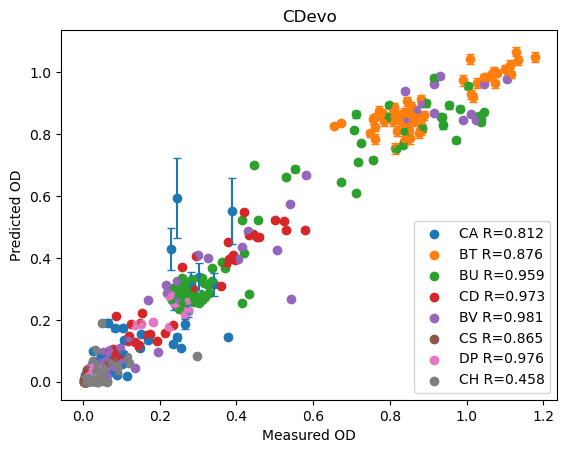

In [4]:
# run kfold for each file 
for file in files:
    strain = file.split("_")[0]
    
    # import data
    df = pd.read_csv(f"data/SET3_Thirdtrial/{file}")
    df.sort_values(by=["Treatments", "Time"], inplace=True)
    
    # make sure that conditions have at least one measurement
    dfs = []
    for treatment, df_t in df.groupby("Treatments"):
        if df_t.shape[0] > 1:
            dfs.append(df_t)
    df = pd.concat(dfs)

    # determine species names 
    species = df.columns.values[2:]

    # separate mono culture data 
    mono_dfs = []
    dfs = []
    treatments = []
    for treatment, df_i in df.groupby("Treatments"):
        # hyphen is only in community conditions
        if "-" in treatment:
            dfs.append(df_i)
            # save treatment name without the replicate identifier 
            treatments.append([treatment.split("_")[0]]*df_i.shape[0])
        else:
            mono_dfs.append(df_i)
    treatments = np.concatenate(treatments)
    unique_treatments = np.unique(treatments)
    mono_df = pd.concat(mono_dfs)
    df = pd.concat(dfs)

    # init kfold object
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)

    # keep track of all predictions
    all_exp_names = []
    all_pred_species = []
    all_true = []
    all_pred = []
    all_stdv = []

    # run Kfold 
    for train_index, test_index in kf.split(unique_treatments):
        
        # get train df
        train_inds = np.in1d(treatments, unique_treatments[train_index])
        train_df = df.iloc[train_inds].copy()
        train_df = pd.concat((mono_df, train_df))
        
        # average replicates in the test_df
        test_df = []
        for test_treatment in unique_treatments[test_index]:
            # pull dataframe with all replicates of same test treatment 
            treatment_inds = np.in1d(treatments, test_treatment)
            df_treatment = df.iloc[treatment_inds].copy()
            
            # get set of unique measurement times
            treatment_times = np.unique(df_treatment.Time.values)
            
            # init dataframe to store averaged values
            avg_df = pd.DataFrame()
            avg_df['Treatments'] = [test_treatment]*len(treatment_times)
            avg_df['Time'] = treatment_times

            avg_data = np.zeros([len(treatment_times), len(species)])
            for i, time in enumerate(treatment_times):
                avg_data[i] = df_treatment.iloc[df_treatment.Time.values==time][species].mean()
            avg_df[species] = avg_data
            test_df.append(avg_df)
        
        # combine averaged dataframes for test dataframe
        test_df = pd.concat(test_df)

        # init model 
        model = gLV(dataframe=train_df, 
                    species=species,
                    nu2=.001, sigma2=.01)

        # init params
        model.init_params(sample=False)
        print(f"Number of parameters: {model.n_params}")

        # fit to data 
        model.fit_posterior_EM()

        # predict test data
        exp_names, pred_species, true, pred, stdv = predict_df(test_df, species)

        # append predictions 
        all_exp_names = np.append(all_exp_names, exp_names)
        all_pred_species = np.append(all_pred_species, pred_species)
        all_true = np.append(all_true, true)
        all_pred = np.append(all_pred, pred)
        all_stdv = np.append(all_stdv, stdv)

        # save prediction results to a .csv
        kfold_df = pd.DataFrame()
        kfold_df['Treatments'] = all_exp_names
        kfold_df['species'] = all_pred_species
        kfold_df['true'] = all_true
        kfold_df['pred'] = all_pred
        kfold_df['stdv'] = all_stdv
        kfold_df.to_csv(f"kfold/{strain}_{n_splits}_fold_VI.csv", index=False)
        
    # show prediction performance of individual species
    for sp in species:
        sp_inds = all_pred_species == sp
        R = linregress(all_true[sp_inds], all_pred[sp_inds]).rvalue
        plt.scatter(all_true[sp_inds], all_pred[sp_inds], label=f"{sp} " + "R={:.3f}".format(R))
        plt.errorbar(all_true[sp_inds], all_pred[sp_inds], yerr=all_stdv[sp_inds], 
                     fmt='.', capsize=3)

    plt.xlabel("Measured OD")
    plt.ylabel("Predicted OD")
    plt.legend()
    plt.title(strain)
    plt.savefig(f"figures/{strain}_{n_splits}_fold_VI.pdf", dpi=300)
    plt.show()